**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Loading Data**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**Explore and visualize the Data**

In [ ]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


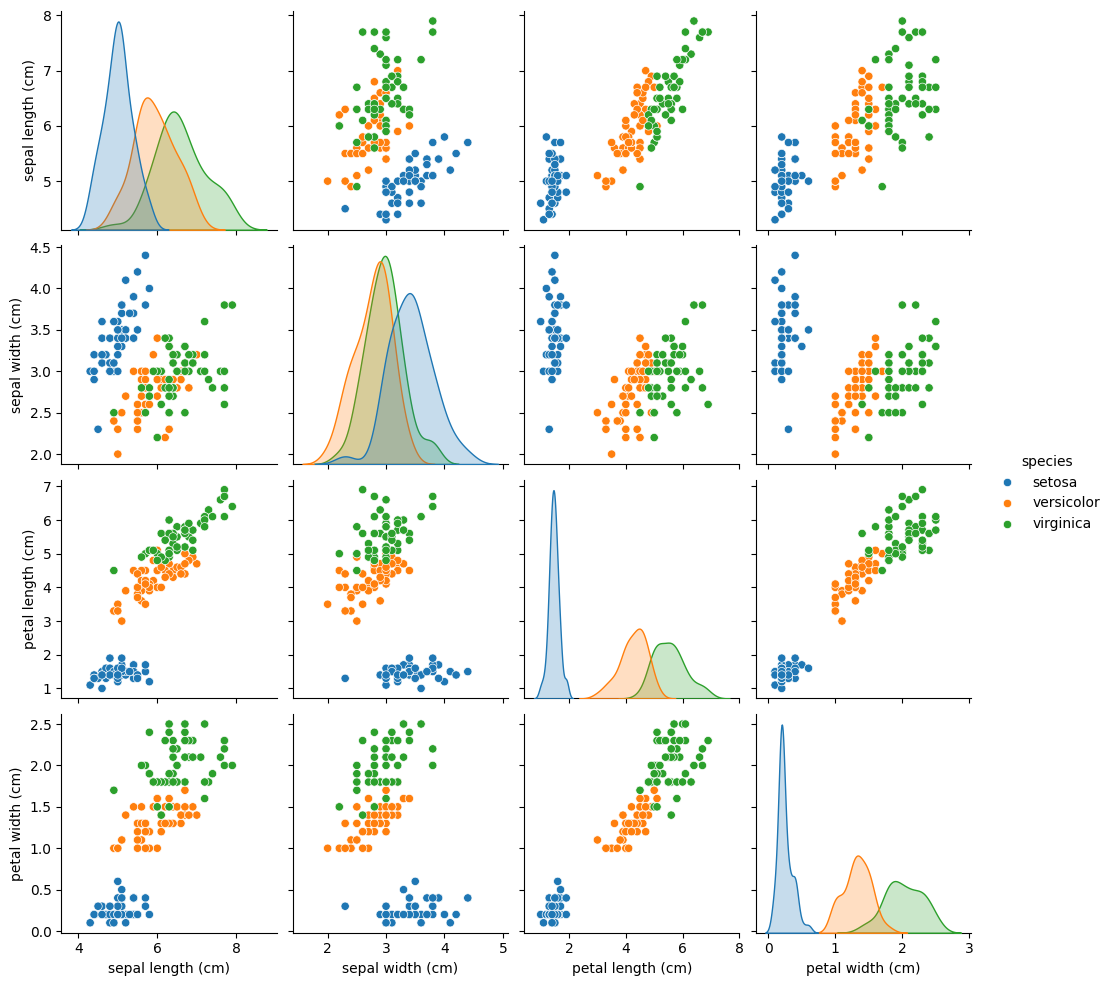

In [ ]:
# Pairplot
sns.pairplot(data, hue='species')
plt.show()

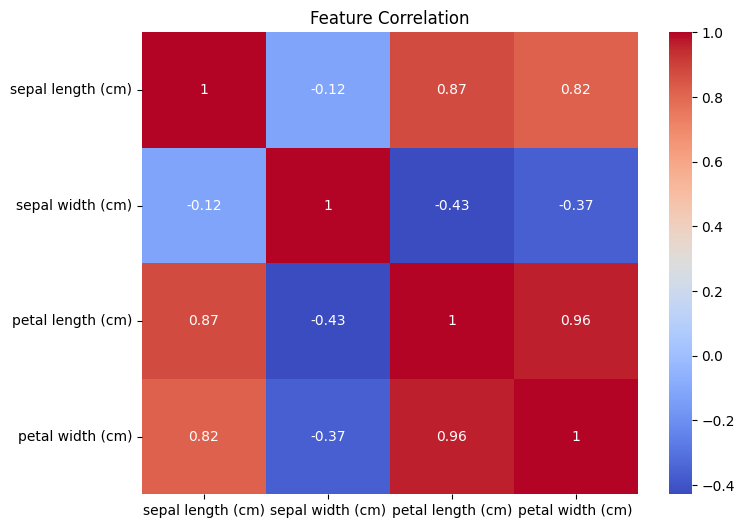

In [ ]:
# Heatmap for feature correlation
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

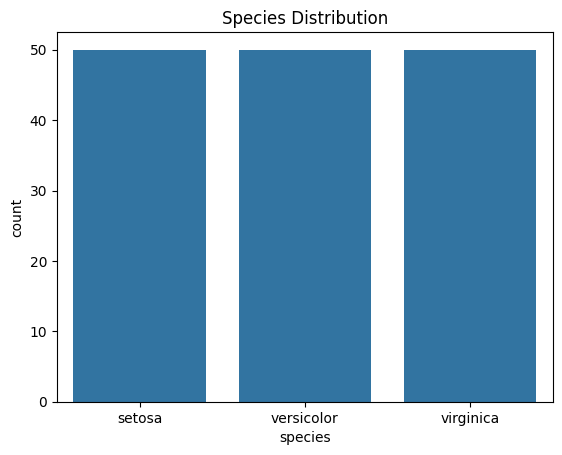

In [ ]:
# Count of each species
sns.countplot(data=data, x='species')
plt.title("Species Distribution")
plt.show()

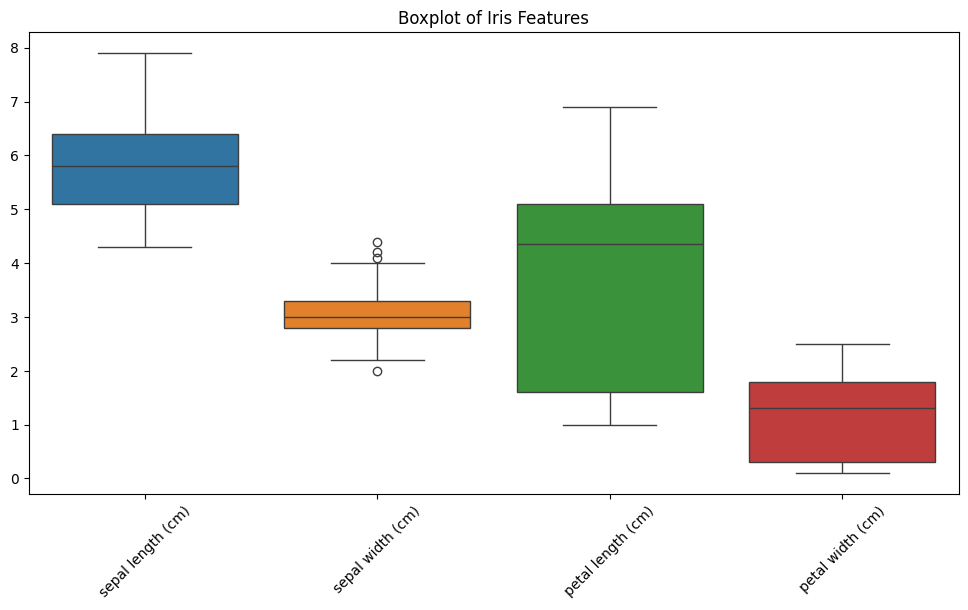

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('species',axis=1))
plt.title("Boxplot of Iris Features")
plt.xticks(rotation=45)
plt.show()

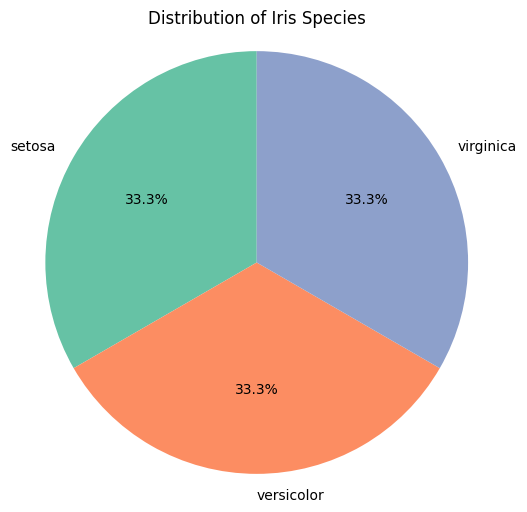

In [ ]:
species_counts = data['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Distribution of Iris Species")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

**Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1)
y = data['species']

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (120, 4)
Test size: (30, 4)


**Training a classification Model**


**Logistic Regession**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)


**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/IRIS.csv")  # Make sure path is correct

# Split features and labels
X = data.drop('species', axis=1)
y = data['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: '/content/IRIS.csv'

**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Dataset
data = pd.read_csv("/content/IRIS.csv")  # Make sure this path is correct

# Step 2: Prepare Features and Target
X = data.drop("species", axis=1)
y = data["species"]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression Model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Step 5: Make Predictions
log_pred = log_model.predict(X_test)

# Step 6: Evaluate Model
print(" Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("\n Classification Report:\n", classification_report(y_test, log_pred))


 Logistic Regression Results:
Accuracy: 1.0

 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Evaluate model using accuracy confusion matrix and classification report


In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
data = pd.read_csv("/content/IRIS.csv")  # ensure file name is correct

# 2. Split features (X) and target (y)
X = data.drop("species", axis=1)  # features
y = data["species"]               # target labels

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = LogisticRegression(max_iter=200)  # increase iterations for convergence
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 7. Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

